In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

# from datetime import date
import datetime


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [5]:
# Find the latest monday, and go back week for week
for k in range(0,7):
    dayToCheck = np.datetime64('today')-np.timedelta64(k,'D')
    thisWeekDay = (dayToCheck).astype(datetime.datetime).isoweekday()    
    if (thisWeekDay == 2):
        latestMonPath = 'SSI_dashboard_'+str(dayToCheck)
        latestMonday = dayToCheck

latestMonPath

df_case = pd.DataFrame()
df_death = pd.DataFrame()
# df_death.append(curdf.iloc[1])

# curMonPath = latestMonPath
numWeeksBack = 100
for k in range(numWeeksBack):
    curMonday = latestMonday - np.timedelta64(k*7+7,'D')
    curMonPath = 'SSI_dashboard_'+str(curMonday)
    curFilePath = path_dash+curMonPath+'/Regionalt_DB/05_bekraeftede_tilfaelde_doede_pr_region_pr_alders_grp.csv'

    if os.path.exists(curFilePath):
        curdf = pd.read_csv(curFilePath,encoding='latin-1',delimiter=';')
        if 'Aldersgruppe' in curdf.columns:
            curdf = curdf.groupby('Aldersgruppe').sum().transpose()
        # if 'Alders gruppe' in curdf.columns:
        else:
            curdf = curdf.groupby('Alders gruppe').sum().transpose()

        rowToAdd = curdf.iloc[1:].copy()
        rowToAdd['Dato'] = curMonday
        rowToAddCase = curdf.iloc[:1].copy()
        rowToAddCase['Dato'] = curMonday

        df_case = pd.concat([df_case,rowToAddCase])
        df_death = pd.concat([df_death,rowToAdd])

df_case_OG = df_case.copy()
df_death_OG = df_death.copy()

# Set dato-columns as index
df_death = df_death.set_index('Dato')
df_case = df_case.set_index('Dato')

# Reverse order and get difference instead of cumulative
df_death = df_death.iloc[::-1].diff()
df_case = df_case.iloc[::-1].diff()

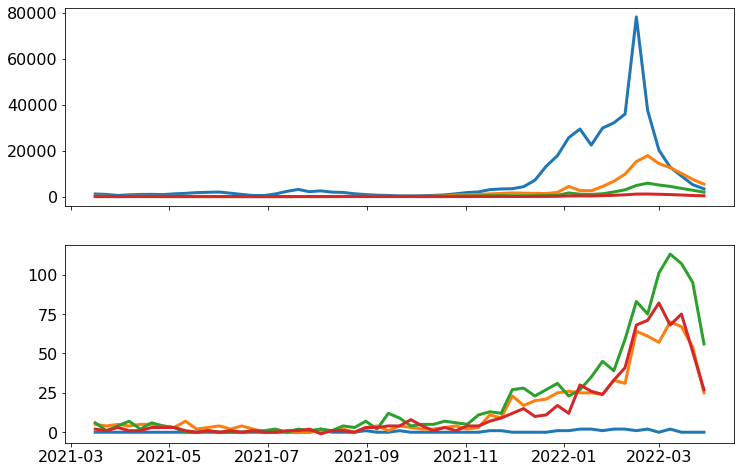

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.plot(df_case.index,df_case['20-29'])
ax2.plot(df_death.index,df_death['20-29'])
ax1.plot(df_case.index,df_case['70-79'])
ax2.plot(df_death.index,df_death['70-79'])
ax1.plot(df_case.index,df_case['80-89'])
ax2.plot(df_death.index,df_death['80-89'])
ax1.plot(df_case.index,df_case['90+'])
ax2.plot(df_death.index,df_death['90+'])

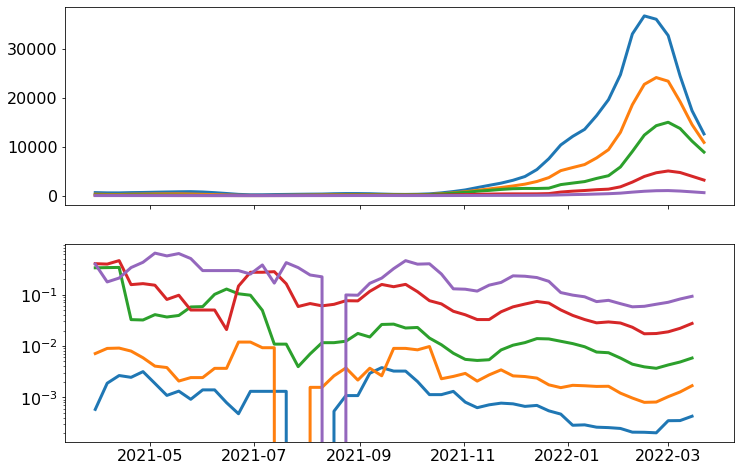

In [24]:
df_cfr = df_death.iloc[1:]/df_case.iloc[:-1]

# fig,ax = plt.subplots()
fig,(ax1,ax) = plt.subplots(2,1,sharex=True)

# ax.plot(df_cfr.index,df_cfr['30-39'])
# ax.plot(df_cfr.index,df_cfr['40-49'])
# ax.plot(df_cfr.index,df_cfr['50-59'])
# ax.plot(df_cfr.index,df_cfr['60-69'])
# ax.plot(df_cfr.index,df_cfr['70-79'])
# ax.plot(df_cfr.index,df_cfr['80-89'])
# ax.plot(df_cfr.index,df_cfr['90+'])
# ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['30-39'],4))
# ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['40-49'],4))
ax1.plot(pf.rnTime(df_case.index,4),pf.rnMean(df_case['50-59'],4))
ax1.plot(pf.rnTime(df_case.index,4),pf.rnMean(df_case['60-69'],4))
ax1.plot(pf.rnTime(df_case.index,4),pf.rnMean(df_case['70-79'],4))
ax1.plot(pf.rnTime(df_case.index,4),pf.rnMean(df_case['80-89'],4))
ax1.plot(pf.rnTime(df_case.index,4),pf.rnMean(df_case['90+'],4))
ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['50-59'],4))
ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['60-69'],4))
ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['70-79'],4))
ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['80-89'],4))
ax.plot(pf.rnTime(df_cfr.index,4),pf.rnMean(df_cfr['90+'],4))

# ax.set_ylim([0,0.2])
# ax1.set_yscale('log')
ax.set_yscale('log')